In [1]:
dataset = "Healthy"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from numpy import mean
from numpy import std
from sklearn.preprocessing import LabelEncoder as le
%matplotlib inline
plt.rcParams['agg.path.chunksize'] = 10000

In [3]:
df = pd.read_csv(dataset+'.csv')
df.head()

,speed,vibration
0,4.188767,-0.002199
1,4.200603,-0.001871
2,4.208165,-0.001542
3,4.226576,-0.001871
4,4.240385,-0.002199


In [4]:
vsig = df["vibration"]
ssig = df["speed"]


newdf = pd.DataFrame()
newdf['speed_log10'] = np.log10(ssig)
newdf['vibration_log10'] = np.log10(vsig)
newdf

/home/h1/607781/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/h1/607781/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,speed_log10,vibration_log10
0,0.622086,NaN
1,0.623312,NaN
2,0.624093,NaN
3,0.625989,NaN
4,0.627405,NaN
...,...,...
1048570,0.632161,NaN
1048571,-0.786267,NaN
1048572,-1.439545,NaN
1048573,-1.435634,NaN


In [5]:
df = newdf.dropna()
df = df.reset_index()
df

,index,speed_log10,vibration_log10
0,36,-1.401937,-3.365188
1,37,-1.451494,-3.365188
2,38,-1.439545,-3.119084
3,39,-1.455551,-3.365188
4,40,0.618011,-3.119084
...,...,...,...
565212,1048554,-1.431759,-2.513979
565213,1048555,-1.424109,-2.563319
565214,1048556,-1.443492,-2.682863
565215,1048557,0.615734,-2.962961


<ipython-input-9-3725c255461f>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="speed_log10", y="vibration_log10", data=newdf, palette="tab10")
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
No

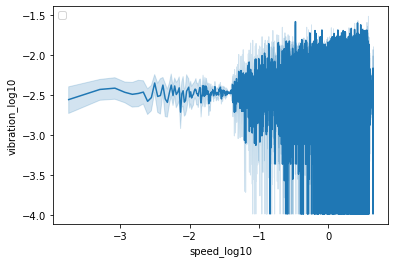

In [9]:
sns.lineplot(x="speed_log10", y="vibration_log10", data=newdf, palette="tab10")
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


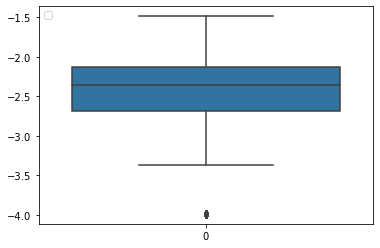

In [10]:
sns.boxplot(df['vibration_log10'])
plt.legend(loc='upper left')
plt.show()

In [13]:
data_mean, data_std = mean(df.vibration_log10), std(df.vibration_log10)
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
data_mean, data_std, lower, upper, cut_off

(-2.474423397728968,
 0.480846032430768,
 -3.9169614950212717,
 -1.0318853004366637,
 1.442538097292304)

In [15]:
lower_boundary = lower
upper_boundary = upper
df = df[(df['vibration_log10']<upper_boundary) & (df['vibration_log10']>lower_boundary)]
df.head()

,index,speed_log10,vibration_log10
0,36,-1.401937,-3.365188
1,37,-1.451494,-3.365188
2,38,-1.439545,-3.119084
3,39,-1.455551,-3.365188
4,40,0.618011,-3.119084


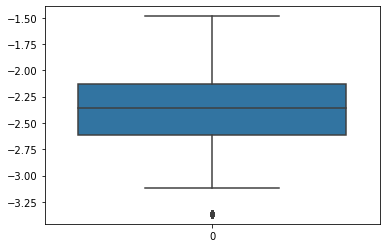

In [16]:
sns.boxplot(df['vibration_log10'])
plt.show()

In [17]:
finalised = df
finalised['Faults'] = dataset
finalised

<ipython-input-17-08f5adb4a8f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalised['Faults'] = dataset


,index,speed_log10,vibration_log10,Faults
0,36,-1.401937,-3.365188,Healthy
1,37,-1.451494,-3.365188,Healthy
2,38,-1.439545,-3.119084,Healthy
3,39,-1.455551,-3.365188,Healthy
4,40,0.618011,-3.119084,Healthy
...,...,...,...,...
565212,1048554,-1.431759,-2.513979,Healthy
565213,1048555,-1.424109,-2.563319,Healthy
565214,1048556,-1.443492,-2.682863,Healthy
565215,1048557,0.615734,-2.962961,Healthy


In [18]:
finalised.to_csv(dataset+'_new.csv', index=False);

In [19]:
df = pd.read_csv(dataset+'_new.csv')
df

,index,speed_log10,vibration_log10,Faults
0,36,-1.401937,-3.365188,Healthy
1,37,-1.451494,-3.365188,Healthy
2,38,-1.439545,-3.119084,Healthy
3,39,-1.455551,-3.365188,Healthy
4,40,0.618011,-3.119084,Healthy
...,...,...,...,...
543282,1048554,-1.431759,-2.513979,Healthy
543283,1048555,-1.424109,-2.563319,Healthy
543284,1048556,-1.443492,-2.682863,Healthy
543285,1048557,0.615734,-2.962961,Healthy
